<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/performance-evaluation/alphas_yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
!pip install --upgrade pandas-datareader
from pandas_datareader import DataReader as pdr


# get monthly market excess return and risk-free rate starting in 1970 from French's data library
ff = pdr('F-F_Research_Data_Factors','famafrench',start=1970)[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# example ticker
ticker = 'VTSMX'

# compute monthly returns from Yahoo data
# put returns in percent form to match French and FRED data
data = pdr(ticker,'yahoo',start=1970)
close = data['Adj Close'].resample('M').last()
ret = 100*close.pct_change()
ret.name = 'ret'

# merge with French data, reducing to 60 months in the process
ret.index = ret.index.to_period('M')
df = ff.join(ret,how='inner')

# compute excess returns for the ticker 
df['ret'] -= df.RF

In [ ]:


# run regression of excess return on market excess return and get beta
result = sm.OLS(df.ret,sm.add_constant(df['Mkt-RF']),missing='drop').fit()
alpha = result.params['const']
beta = result.params['Mkt-RF']

t_alpha = result.tvalues['const']
rsquared_adj = result.rsquared_adj

# print annualized alpha
print(ticker,'annual alpha (%) is', np.round(alpha*12,3),'\n')

# print annualized alpha
print(ticker,'t-statistic of alpha is', np.round(t_alpha,3),'\n')

# print beta
print(ticker,'beta is', np.round(beta,3),'\n')

# print rsquared_adj
print(ticker,'R-squared is', np.round(rsquared_adj,3),'\n')



VTSMX annual alpha (%) is -0.178 

VTSMX t-statistic of alpha is -1.622 

VTSMX beta is 0.994 

VTSMX R-squared is 0.998 



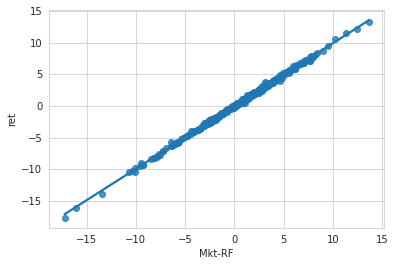

In [ ]:
# plot regression
sns.regplot(data=df,x='Mkt-RF',y='ret',ci=None)